# Explore here

In [1]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [4]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [34]:
#Factorizamos variables categoricas
for columna in df.columns:
    if df[columna].dtype not in ('int64', 'float64'):
        df[columna] = pd.factorize(df[columna])[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


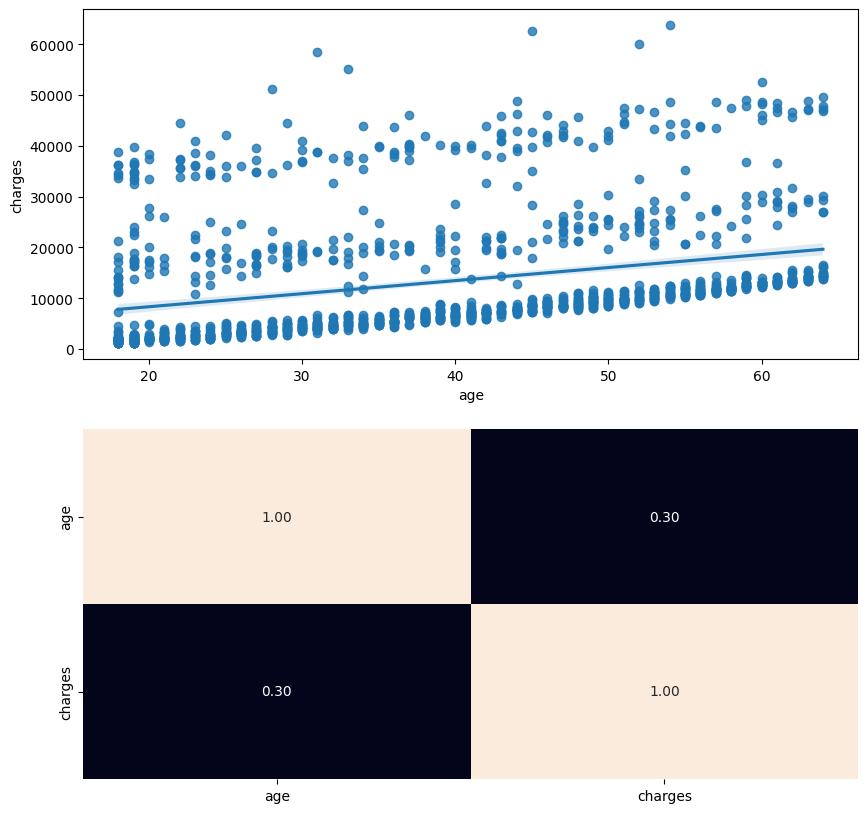

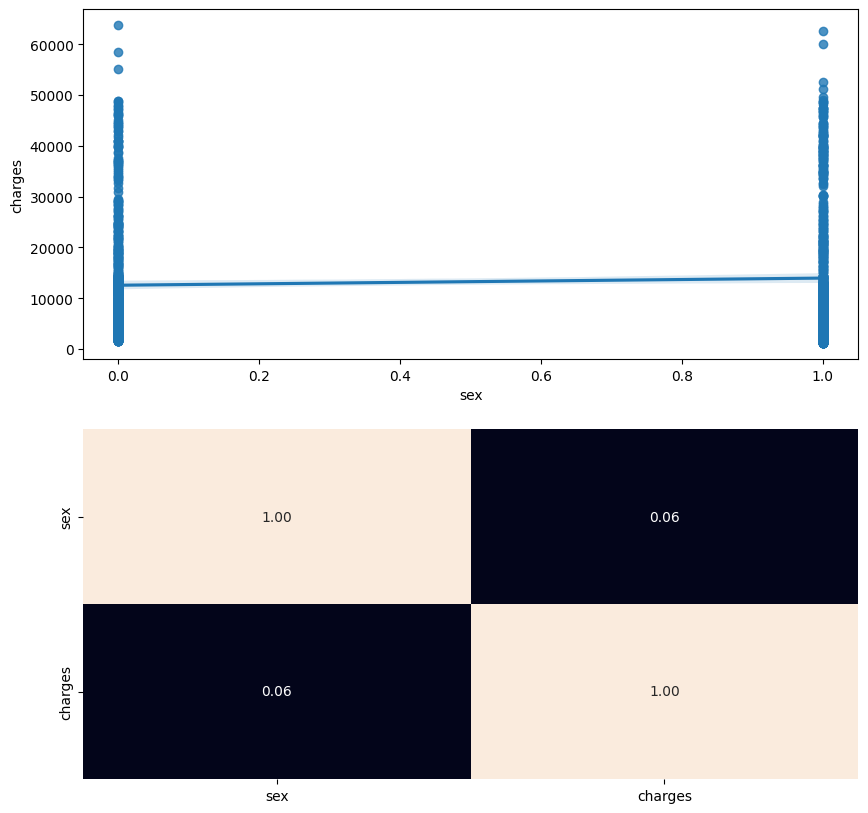

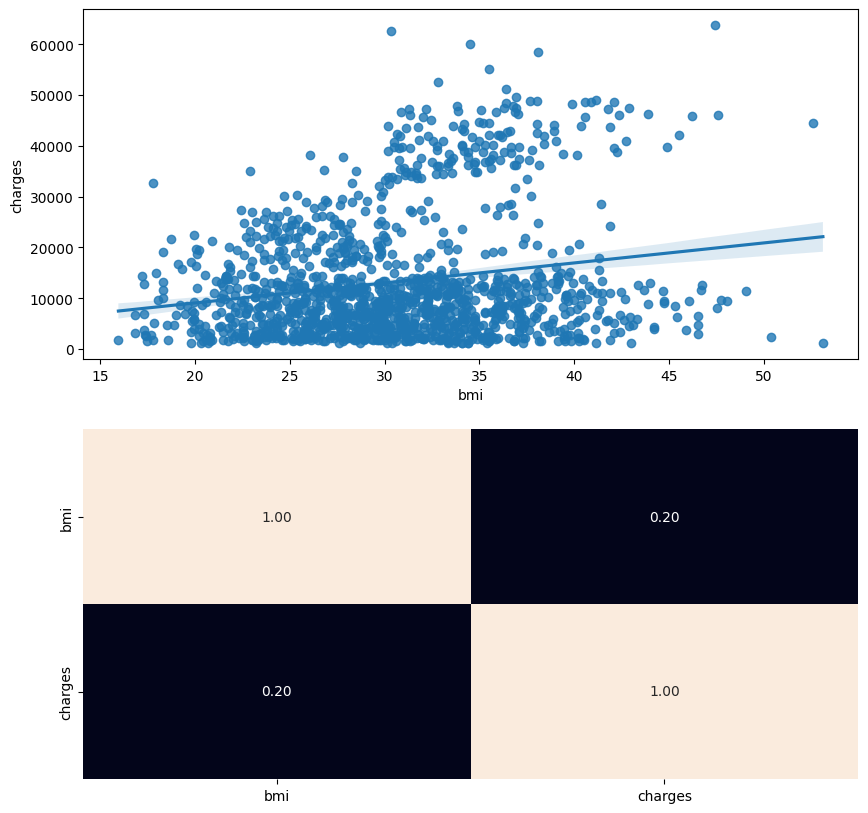

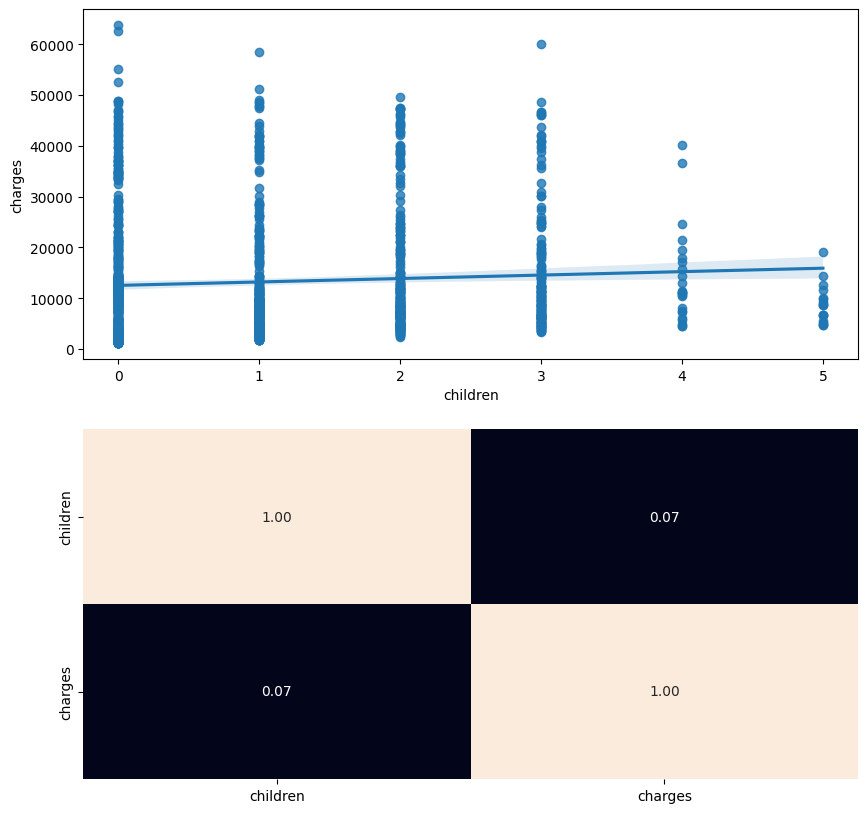

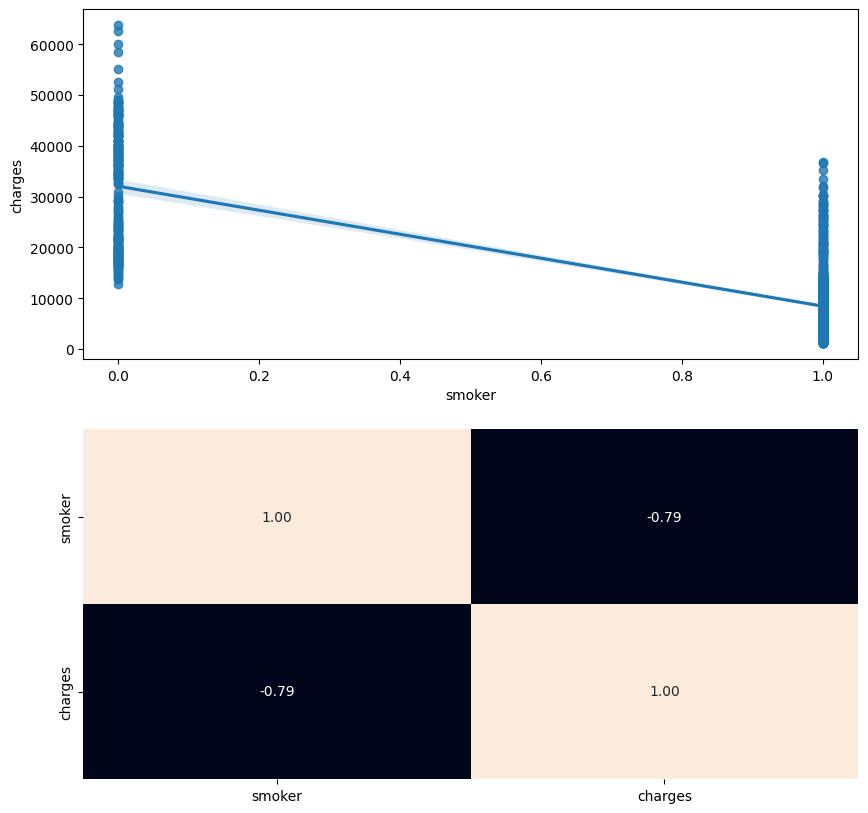

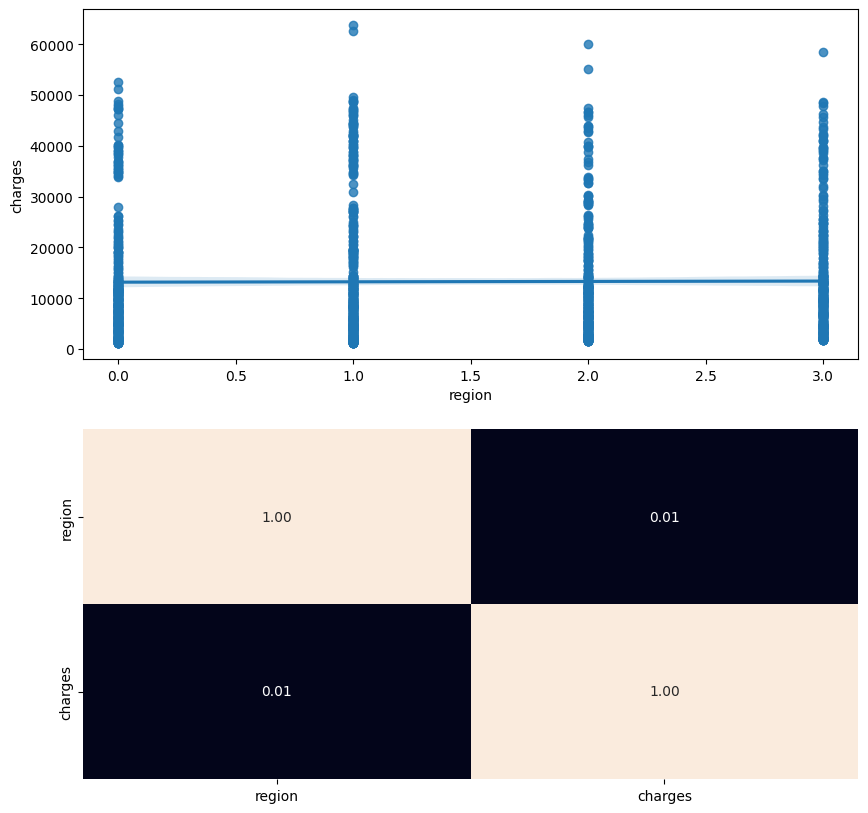

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

#charges es columna objetivo
for columna in df.columns:
    if columna not in ('charges'):
        fig, axis = plt.subplots(2,1, figsize=(10, 10))
        sns.regplot(df,x=columna,y='charges', ax=axis[0])
        sns.heatmap(df[[columna, 'charges']].corr(), annot = True, fmt = ".2f",ax = axis[1], cbar = False)
        plt.tight_layout
        plt



In [18]:
X = df[['smoker','age','bmi']]
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)
X_train.head()

,smoker,age,bmi
1114,1,23,24.510
968,1,21,25.745
599,1,52,37.525
170,1,63,41.470
275,1,47,26.600


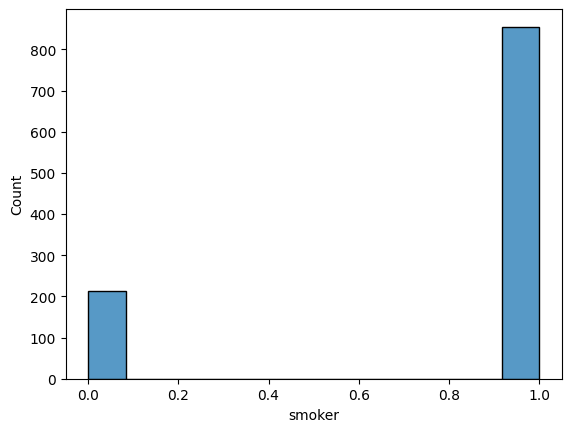

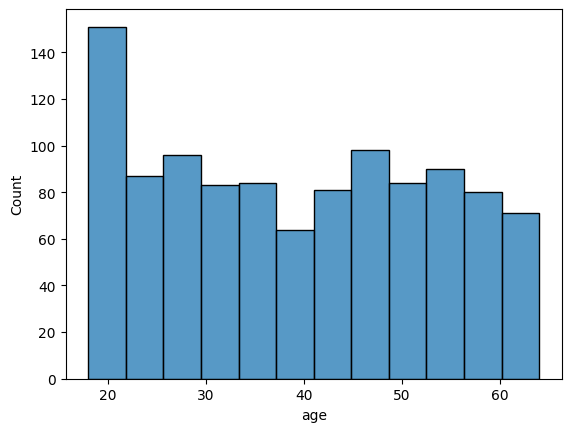

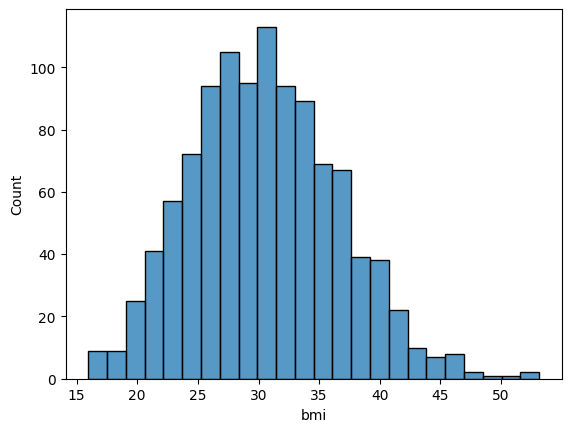

In [42]:
for columna in X_train.columns:
    sns.histplot(X_train, x=columna)
    plt.show()

aqui podemos ver la correlacion de distintas variables

podemos notar que smoker-count, age - count tienen una baja correlacion

mientras que bmi-count tienen una alta correlacion, esto es demostrado por la distribucion en forma de la campana de gasuss.

Seguidamente tenemos que escalar los datos, para estos utilizamos preprocessing, tenemos la opcion de utilizar MinMaxScaler o Standar Scaler

cuando usamos uno o el otro? la respuesta esta en los graficos anteriores!!

Si la mayoria de los graficos demuestran que siguen una distribucion normal, se usa standar scaler
Si la mayorria de los graficos demuestran que NO SIGUEN una distribucion normal, se utiliza min max scaler

en este caso, 2 de los 3 graficos demuestran que sus datos no siguien una distribucion normal y es por esto que escogimos utilizar MinMax Scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler
#la difererncia entre min max y standar scaler es 
#si la mayoria parece cmapana de gaussiana, se usa standar scaler
#si no, se usa min max scaler
scaler = MinMaxScaler()
X_train_esc = scaler.fit_transform(X_train, y_train)
#lo que hace es aprender de x de train y x de train para saber que tranasformacion va a hacer para realizar el min max escaler, aprendio de los datos y sabe que conversion va a hacer (aqui solo va aprender)
#esto es para evitar que se vea contaminado

X_test_esc = scaler.transform(X_test)

#convertimos a dataframe
X_train_esc = pd.DataFrame(X_train_esc, columns=X_train.columns, index=X_train.index)
X_test_esc = pd.DataFrame(X_test_esc, columns=X_test.columns, index=X_test.index)
X_train_esc.head()

,smoker,age,bmi
1114,1.0,0.108696,0.230024
968,1.0,0.065217,0.263250
599,1.0,0.739130,0.580172
170,1.0,0.978261,0.686306
275,1.0,0.630435,0.286252


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_esc, y_train)
print(f"Intercepto(a): {model.intercept_}")
print(f"Coeficientes(b1,b2,b3): {model.coef_}")


Intercepto(a): 21701.79391257019
Coeficientes(b1,b2,b3): [-23074.26173498  11586.30415359  11329.51105637]


Aqui obtenemos nuestros primeros resultados de modelo con los datos que entrenamos, los cuales nos indican

si no son fumadores se resta -23074.26173498
por cada año que pasa se suma 11586.30415359  
por cada punto de bmi se le suma 11329.51105637

In [28]:
y_pred = model.predict(X_test_esc)
y_pred

array([ 8433.67443577,  4336.46678013, 13165.0382606 , 30593.69534864,
        8738.64384303, 13004.1887831 , 29273.63576136,  2177.09021482,
       10922.95093736, 10315.83022735, 11021.84491859, 33740.33309282,
       30613.92158231, 18004.87150727,  9656.23179762,  9311.37354392,
        4325.12010919, 32099.96630635,  3001.71338943,  5552.62898392,
        4325.12010919, 29913.00795743, 14580.01800456, 30752.45719245,
       31444.92261851,  4769.02189756, 35187.05259131, 37413.46842278,
       10952.8675722 , 12177.75978526,  6505.9651105 , 13121.95183512,
         870.87899962, 12471.87695664, 40355.37672202, 12499.04467281,
        2732.11267963,  2866.20850841, 32023.18474965,  9365.1280589 ,
        6903.0538664 , 29243.81679061, 34097.79751626, 11919.91981386,
        6896.22734444,  4145.55111435,  6040.33037213,  9173.38425823,
        4186.69945959,  8909.59778913,  6340.1295272 , 12053.6361681 ,
       30836.41015271,  4425.70495311, 10719.84316929,  9666.05445578,
      

In [29]:
from sklearn.metrics import root_mean_squared_error,r2_score

print(f'Error cuadratico medio: {root_mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Error cuadratico medio: 5986.783344847843
R2: 0.8049502474643171


me puedo equivocar en la prediccion de primas por cobrar alrededor de $5986.78

R2 nos dice que el modelo explica el 80% (0.8049) de los datos

"explica" significa que estas tres variables, puedo explicar el 80% de las primas que puedo cobrar 

En el data set el modelo acerto del 80% de los cargos que se le cobro a las personas 

debemos buscar modelo con +90% 

cuando es menos que esto,se deberia considerar descartar el modelo, esto es debido a las bajas correlaciones que presenta el modelo

Que conclusiones obtenemos del ejercicio?

Primero notamos que existe baja correlacion entre las 3 variables
Segundo conocemos el error de prediccion del modelo 
Tercero conocemos la relacione que tiene las variables age, bmi y smoke con "charges"
    Como varia charges cuando 'age' aumenta (la edad no puede disminuir)
    Como varia charges cuando 'bmi' aumenta o disminuye
    Como varia charges cuando 'smoke' es si o no 
Finalmente conocemos 
    El error cuadratico medio que nos dice cuanto vario el error en las predicciones que realizo el modelo
    El r2 que nos indica:"basado en estas x variables" el modelo explica el 80% de las variables
    ###Me gustaria profundizar en el significado del r2###

Recomendaciones

Para mejorar el modelo se recomienda:
    Aumentar base de datos
    Buscar variables con mayor correlacion a 'charges'
    Aumentar variables numericas consideradas en el modelo
###En resumen necesitamos mas informacion###

Siguendo estas recomendaciones podriamois mejorar el R2 del modelo y reducir el error cuadratico medio, obteniendo de esta manera un modelo mas robusto y exacto

In [ ]:
Guardamos el modelo

In [31]:
from pickle import dump, load
dump(model, open('../models/linear_regression_model_carlos_salinas','wb'))